In [1]:
from helpers.vae import VAE
from helpers.train import train_online, train
from helpers.train import train_online_alternately
from helpers.convert_to_var_foo import convert_to_var

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.nn import functional as F

In [4]:
schedule = np.load('../trajectory.npy')

In [5]:
np.unique(schedule)

array([0, 1, 2, 3, 4])

In [6]:
dim = 50
num_classes = len(np.unique(schedule))

In [7]:
def get_one_hot_object(obj_class, dim, num_classes):
    x = np.zeros(dim)
    x[:(dim//num_classes) * (obj_class+1)] = 1
    return x

In [8]:
len(schedule)

3122

In [9]:
X_train = []
X_test = []
num_per_class = 250
for i in range(num_classes):
    X_test.append(get_one_hot_object(i, dim, num_classes))
    for j in range(num_per_class):
        X_train.append(get_one_hot_object(i,
                                          dim, num_classes))
X_train = np.array(X_train)
X_test = np.array(X_test)

0.3039718129404228
CPU times: user 8min 34s, sys: 1.4 s, total: 8min 35s
Wall time: 3min 17s


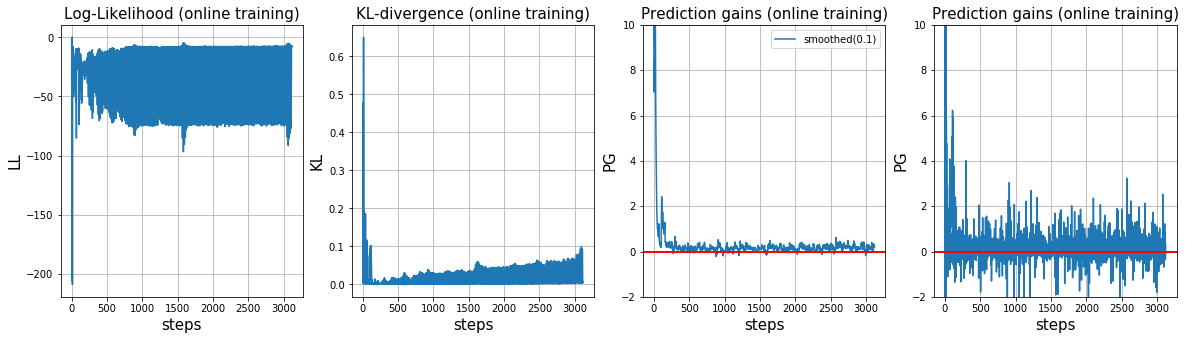

In [10]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)

0.3526585522101217
CPU times: user 8min 38s, sys: 1.52 s, total: 8min 39s
Wall time: 3min 19s


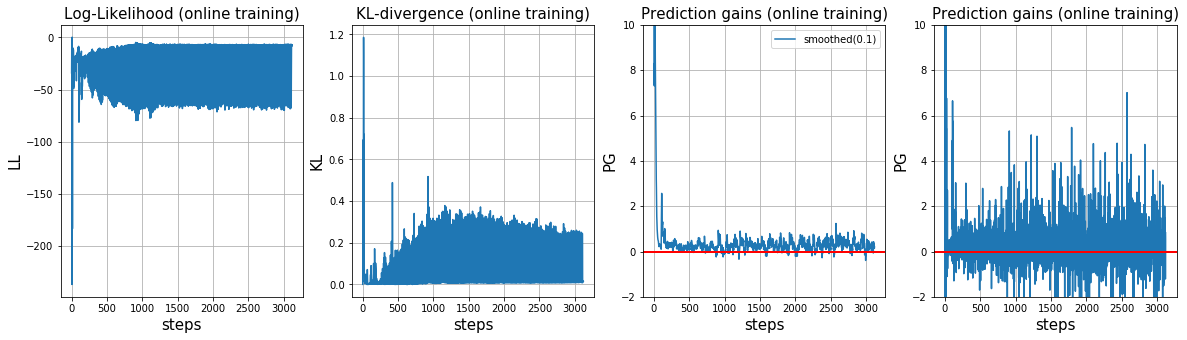

In [11]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1e-3, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)

0.07911595131326073
CPU times: user 8min 48s, sys: 1.58 s, total: 8min 49s
Wall time: 3min 25s


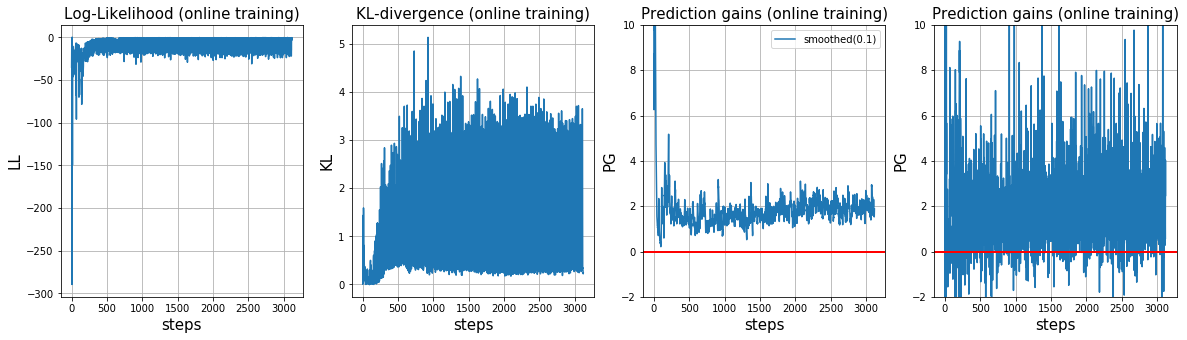

In [12]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1e-5, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)

0.1367713004484305
CPU times: user 9min 46s, sys: 2.34 s, total: 9min 49s
Wall time: 4min 14s


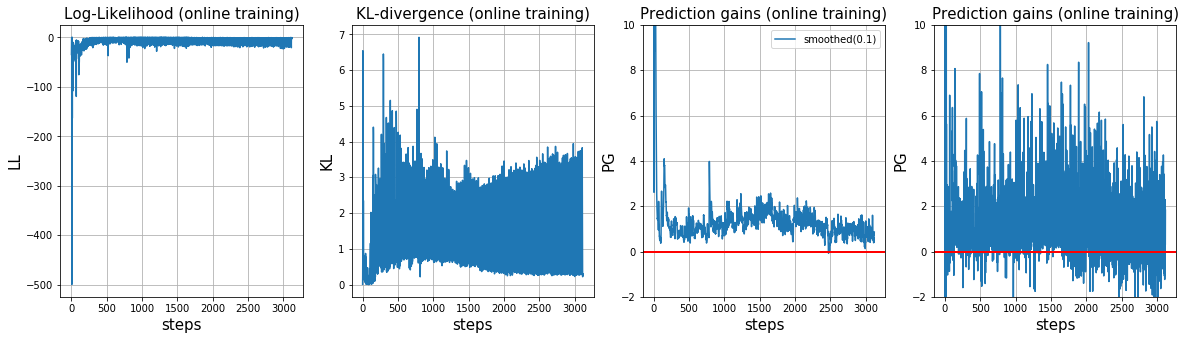

In [13]:
%%time
model = VAE(input_shape=(-1, dim), n_samples=100)
kl_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)
ll_optimizer = optim.RMSprop(model.parameters(), lr=1e-4, momentum=0.9)

results = train_online_alternately(schedule, X_test,model,
                                   kl_optimizer, ll_optimizer, 
                                   kl_weight=1e-6, alpha=0.1, img_name=None)
mean_last_ll, pct, all_log_probs, pgs, total_loss_gains, kl_gains = results
print(pct)